# Applications of ML in Wireless Communication

A novel spectrum sensing algorithm for cognitive radio.

In [ ]:
# !pip install -U -q PyDrive
 
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# file_list = drive.ListFile({'q': "'16WVvmPMSMSsO6MXpOc7JbP7NcVhquCbV' in parents and trashed=false"}).GetList()
# for file1 in file_list:
#  print('title: %s, id: %s' % (file1['title'], file1['id']))

# train_downloaded = drive.CreateFile({'id': '10jL51a4dyF6lkk5h7tSD1y2xK2zMh--b'})
# train_downloaded.GetContentFile('536_5.dat')
# train_downloaded = drive.CreateFile({'id': '1HoKo3-Ungo7SJDUZYf6oCmlQW5Vih1c4'})
# train_downloaded.GetContentFile('959_45db')
# train_downloaded = drive.CreateFile({'id': '1PSumEl3QRv06rVE2BDtQpcG3_sD5cGH2'})
# train_downloaded.GetContentFile('1840')
# train_downloaded = drive.CreateFile({'id': '1CVsbcNF6HuKNK0bD9kOku9IrFjc2pHd2'})
# train_downloaded.GetContentFile('96_7_45db')

# 1. Importing and Initializing data

The list of packages that will be used in the study: -

1. numpy - For vectorized implementation
2. math - Inbuilt support for mathematical operations
3. time - measuring runtime
4. keras - for LSTM model, training and testing

In [ ]:
import numpy as np
import math
from scipy.stats import norm
import time
import pandas as pd
import statsmodels.api as sm
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.models import Sequential
from matplotlib import pyplot as plt
#import plotly.offline as py
#import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data for all he four technologies are loaded into their respective vector names. They are all reshaped to convert them from Rank 1 arrays to proper Numpy vectors.

# 2.Retreiving data

Retreiving data from the files for all the four wireless technologies.

In [ ]:
from google.colab import files
uploads = files.upload()

Saving 96_7_20db to 96_7_20db


In [ ]:
# Importing data from file (96.7 MHz)
FM = np.fromfile('96_7_20db', dtype=np.float32)

# Reshaping to convert to a proper NUMPY vector
FM = np.reshape(FM, (FM.shape[0], 1))

# Shape of FM signal vector
print("Size of FM: " + str(FM.shape))

# # Importing data from file (536.5 MHz)
# UHF = np.fromfile('536_5.dat', dtype=np.float32)

# # Reshaping to convert to a proper NUMPY vector
# UHF = np.reshape(UHF, (UHF.shape[0], 1))

# # Shape of UHF signal vector
# print("Size of UHF: " + str(UHF.shape))

# # Importing data from file (959 MHz)
# GSM = np.fromfile('959_45db', dtype=np.float32)

# # Reshaping to convert to a proper NUMPY vector
# GSM = np.reshape(GSM, (GSM.shape[0], 1))

# # Shape of GSM signal vector
# print("Size of GSM: " + str(GSM.shape))

# # Importing data from file (1840 MHz)
# DCS = np.fromfile('1840', dtype=np.float32)

# # Reshaping to convert to a proper NUMPY vector
# DCS = np.reshape(DCS, (DCS.shape[0], 1))

# # Shape of DCS signal vector
# print("Size of DCS: " + str(DCS.shape))

Size of FM: (2971649, 1)


# 3. Creating NUMPY equivalent for bandpower function

A MATLAB equivalent for bandpower function is created.

In [ ]:
def bandpower(signal):
  return np.mean(signal ** 2)
  

In [ ]:
bandpower(FM)

0.08850595

# 4. Creating NUMPY equivalent for AWGN (Additive White Gaussian Noise) function

First of all, the SNR (Signal-to-noise ratio) is converted from decibel scale to linear scale using the given formula:

$$\text{SNR}_{\text{linear}} = 10 ^ {\frac{\text{SNR}_{\text{dB}}}{10} }$$


The variance of standard the signal is adjusted using the formula given below:

$$\text{SNR}_{\text{linear}} = \frac{Power(signal)}{Var(noise)}\\
\implies \boxed{Power(signal) = Var(noise) \times \text{SNR}_{\text{linear}}}$$

In [ ]:
def awgn(signal, desired_snr):
  
  # Converting the SNR from dB scale to linear scale
  snr_linear = math.pow(10, desired_snr / 10)
  
  # Standard normally distributed noise
  noise = np.random.randn(signal.shape[0], 1)
  
  # Using the boxed formula
  var_signal = bandpower(noise) * snr_linear
  
  # Normalizing the signal to have the given variance
  normalized_signal = math.sqrt(var_signal) * (signal / math.sqrt(bandpower(signal)))
  
  print("SNR = " + str(10 * math.log10(bandpower(normalized_signal) / bandpower(noise))))
  
  return normalized_signal + noise

# 5. Filtering the data

The datasets are filtered to remove any transient peaks. Values between $10^{-7}$ and $1$ are retained, others are discarded.

In [ ]:
# Datasets are filtered to contain values between 10 ^ -7 and 1

FM = FM[np.logical_and(FM > math.pow(10, -7), FM < 1)]
FM = FM.reshape(FM.shape[0], 1)

# UHF = UHF[np.logical_and(UHF > math.pow(10, -7), UHF < 1)]
# UHF = UHF.reshape(UHF.shape[0], 1)

# GSM = GSM[np.logical_and(GSM > math.pow(10, -7), GSM < 1)]
# GSM = GSM.reshape(GSM.shape[0], 1)

# DCS = DCS[np.logical_and(DCS > math.pow(10, -7), DCS < 1)]
# DCS = DCS.reshape(DCS.shape[0], 1)

# Shape of FM signal vector
print("Size of FM: " + str(FM.shape))

# # Shape of UHF signal vector
# print("Size of UHF: " + str(UHF.shape))

# # Shape of GSM signal vector
# print("Size of GSM: " + str(GSM.shape))

# # Shape of DCS signal vector
# print("Size of DCS: " + str(DCS.shape))

# print(awgn(GSM[0:100000], 4).shape)

Size of FM: (2971649, 1)


# 6. Making the dataset ready

The following will create a dataset for the signal with a given SNR, number of samples and size of the samples in the sensing event. Dataset is constructed based on Energy values: -

Energy of the sensing event $E$ is given by,

$$E = \sum_{i = 1} ^{N} \big|y[n]\big|^{2} $$

In [ ]:
def create_dataset(signal, desired_snr, samples, sample_size):
  
  # Creating the signal with desired SNR
  snr_signal = awgn(signal[0:samples * sample_size], desired_snr)
  
  # Allocating zeros to the dataset
  X = np.zeros((samples, 1))
  
  for i in range(0, samples):
    
    # Extracting the sample based on sample size
    sampled_signal = snr_signal[i * sample_size : (i + 1) * sample_size]
    
    # Sorting the sampled signal
    sampled_signal = np.sort(sampled_signal, axis=0)
    
    # Energy detection
    E = np.sum(sampled_signal ** 2)
    
    # Assigning values to the dataset
    X[i][0] = E
  
  return X

In [ ]:
a = time.time()
print(create_dataset(FM[50000:], 4, 15000, 100).shape)
b = time.time()

# Printing the time taken for execution
print(b - a)

SNR = 4.00000125402898
(15000, 1)
0.2895348072052002


Making the dataset for all the SNRs in the range -20 till 4 with step size of 2. The following function will take a range of SNRs as input and will output the dataset. Other inputs are the sample size, the signal, and, the number of samples per SNR.

In [ ]:
def final_dataset(signal, snr_range, samples_per_snr, sample_size):
  X = {}
  
  for snr in snr_range:
    # Creating dataset for the given SNR
    X_snr = create_dataset(signal, snr, samples_per_snr, sample_size)
    
    # Indexing within the final dataset matrix X
    X[snr] = X_snr
  
  return X

In [ ]:
a = time.time()

# FM
X_FM = {**final_dataset(FM[100000:], range(-20, -4, 2), 5000, 100), **final_dataset(FM[100000:], range(-4, 6, 2), 12000, 100)}
X_test_FM = final_dataset(FM[300000:], range(-20, 6, 2), 5129, 100)
b = time.time()

# Printing the time taken for execution
print("Time taken :- " + str(b - a))

SNR = -20.000001333538464
SNR = -18.000000741791506
SNR = -15.999999694125083
SNR = -14.000000319012639
SNR = -12.000000996730673
SNR = -10.000000357665403
SNR = -8.000001295189422
SNR = -6.000000741068545
SNR = -3.9999994920335817
SNR = -1.9999998969102293
SNR = 8.765949577693911e-07
SNR = 2.0000007722775077
SNR = 3.9999993993465157
SNR = -19.99999958329951
SNR = -17.999999903800486
SNR = -15.999999082669405
SNR = -13.999999223175383
SNR = -11.99999855124716
SNR = -9.999998640080442
SNR = -7.999998598203623
SNR = -5.99999985765999
SNR = -3.999998389881654
SNR = -1.9999992885737459
SNR = 1.5062243074623643e-07
SNR = 2.0000011805605435
SNR = 4.000000462498317
Time taken :- 3.0749876499176025


# 7. Generating White noise sequence

White noise of variance 1 is generated and is labelled as 0.

In [ ]:
def create_noise_sequence(samples, sample_size):
  
  # Creating white noise sequence of variance 1
  noise = np.random.randn(samples * sample_size, 1)
  
  # Allocating zeros to the dataset
  X = np.zeros((samples, 1))
  
  for i in range(0, samples):
    
    # Extracting the sample based on sample size
    sampled_signal = noise[i * sample_size : (i + 1) * sample_size]
    
    # Sorting the sampled signal
    sampled_signal = np.sort(sampled_signal, axis=0)
    
    # Energy detection
    E = np.sum(sampled_signal ** 2)
    
    # Assigning values to the dataset
    X[i][0] = E
  
  return X

In [ ]:
a = time.time()
X_noise = create_noise_sequence(100000, 100)
b = time.time()

print("Time taken = " + str(b - a))

print(X_noise.shape)

Time taken = 1.7708251476287842
(100000, 1)


# **8. Autocorrelation Function** 

The autocorrelation function for energy values is plotted for the wireless technology FM.

In [ ]:
# for snr in range(-20, 6, 2):
#   plt.figure(figsize=(15,7))
#   ax = plt.subplot(211)

#   x = X_UHF[snr][:, 0]
#   x = x.reshape(x.shape[0], 1)

#   sm.graphics.tsa.plot_acf(x, lags=50, ax=ax)
#   plt.title("Autocorrelation in energy values at SNR = " + str(snr))
#   # ax = plt.subplot(212)
#   # sm.graphics.tsa.plot_pacf(x, lags=50, ax=ax)
#   # plt.title("Partial Autocorrelation in energy values at SNR = " + str(snr))
#   # plt.tight_layout()
#   plt.show()

# **9. DataSet with Lookback for ANN**

> Indented block



The output of an Recurrent Neural network depends on the previous training examples. Here, we will define a lookback to determine how many previous examples should the RNN look into to predict the output.

In [ ]:
# Function for Chaning the dataset for look back
def create_look_back(X, look_back=1):
  
  # Look back dataset is initialized to be empty
  look_back_X = []
  
  for i in range(len(X) - look_back + 1):
    # Extracting an example from the dataset
    a = X[i:(i + look_back), :]
    
    a = a.flatten() # (For flattening)
    
    # Appending to the dataset
    look_back_X.append(a)
  
  look_back_Y = []
    
  # Returning in numpy's array format
  return np.array(look_back_X)

The following function will insert look backs into our dataset for all the SNRs.

In [ ]:
def dataset_look_back(X_tech, snr_range, look_back):
  X_tech_lb = {}
  
  # Look backs for all SNRs
  for snr in snr_range:
    X_tech_lb[snr] = create_look_back(X_tech[snr], look_back)
  
  return X_tech_lb

In [ ]:
look_back = 2

X_FM_lb = dataset_look_back(X_FM, range(-20, 6, 2), look_back)
print(X_FM_lb[-20].shape)

X_noise_lb = create_look_back(X_noise, look_back)
print(X_noise_lb.shape)

X = X_FM_lb[-20]
y = []

for snr in range(-18, 6, 2):
  X = np.concatenate((X, X_FM_lb[snr]), axis=0)

y = np.ones((X.shape[0], 1))
 
print(X.shape)
print(X_noise_lb.shape)
X = np.concatenate((X, X_noise_lb), axis=0)

y = np.concatenate((y, np.zeros((X_noise_lb.shape[0], 1))))
#Xtrain, Xtest, Ytrain and Ytest (in matlab as .mat files)

(4999, 2)
(99999, 2)
(99987, 2)
(99999, 2)


# 10. Creating the ANN model

Defining a sequential model with two stacked LSTM layers with a single Dense output layer

In [ ]:
seed = 9
np.random.seed(seed)
#Loading the data, here It's a feature data, which contains 4 features as mentioned in papers 

#ANN Model 
# create model
model = Sequential() # This means it's sequential model, which is from one direction to another in sequence 
model.add(Dense(7, input_dim=2, kernel_initializer='uniform', activation='relu'))#First layer with 20 nodes and as we have 4 features so input_dim would be 4, relu suits well for binary classification so I have used it 
#model.add(Dense(10, init='uniform', activation='relu')) #You can add as many hidden layer you want, but with time complexity 
#model.add(Dense(5,init='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #Output layer

# Compile model
#This function you have to explore in case you want to do the mathematic analysis
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 11. Training the ANN model

In [ ]:
X=X.reshape(199986,2,1)
X_ANN = X
X_ANN=X_ANN.reshape(199986,2)

In [ ]:
# Fit the model
#Training and batch size
model.fit(X_ANN, y, epochs=20, batch_size=150,verbose=2)

#Evaluate the model
scores = model.evaluate(X_ANN, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/20
1334/1334 - 3s - loss: 0.5923 - accuracy: 0.6324
Epoch 2/20
1334/1334 - 3s - loss: 0.4702 - accuracy: 0.8010
Epoch 3/20
1334/1334 - 3s - loss: 0.4328 - accuracy: 0.8020
Epoch 4/20
1334/1334 - 3s - loss: 0.4236 - accuracy: 0.8028
Epoch 5/20
1334/1334 - 3s - loss: 0.4210 - accuracy: 0.8023
Epoch 6/20
1334/1334 - 3s - loss: 0.4207 - accuracy: 0.8016
Epoch 7/20
1334/1334 - 3s - loss: 0.4197 - accuracy: 0.8018
Epoch 8/20
1334/1334 - 3s - loss: 0.4206 - accuracy: 0.8017
Epoch 9/20
1334/1334 - 3s - loss: 0.4197 - accuracy: 0.8020
Epoch 10/20
1334/1334 - 3s - loss: 0.4195 - accuracy: 0.8020
Epoch 11/20
1334/1334 - 3s - loss: 0.4197 - accuracy: 0.8014
Epoch 12/20
1334/1334 - 3s - loss: 0.4197 - accuracy: 0.8020
Epoch 13/20
1334/1334 - 3s - loss: 0.4205 - accuracy: 0.8011
Epoch 14/20
1334/1334 - 3s - loss: 0.4193 - accuracy: 0.8021
Epoch 15/20
1334/1334 - 3s - loss: 0.4200 - accuracy: 0.8017
Epoch 16/20
1334/1334 - 3s - loss: 0.4199 - accuracy: 0.8012
Epoch 17/20
1334/1334 - 3s - loss

157/157 [==============================] - 0s 2ms/step - loss: 1.3654 - accuracy: 0.1116
At SNR = -20
accuracy: 11.16%
157/157 [==============================] - 0s 2ms/step - loss: 1.3317 - accuracy: 0.1312
At SNR = -18
accuracy: 13.12%
157/157 [==============================] - 0s 1ms/step - loss: 1.2857 - accuracy: 0.1412
At SNR = -16
accuracy: 14.12%
157/157 [==============================] - 0s 2ms/step - loss: 1.2203 - accuracy: 0.1812
At SNR = -14
accuracy: 18.12%
157/157 [==============================] - 0s 2ms/step - loss: 1.0721 - accuracy: 0.2625
At SNR = -12
accuracy: 26.25%
157/157 [==============================] - 0s 2ms/step - loss: 0.9280 - accuracy: 0.3809
At SNR = -10
accuracy: 38.09%
157/157 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5803
At SNR = -8
accuracy: 58.03%
157/157 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7884
At SNR = -6
accuracy: 78.84%
375/375 [==============================] - 1s 2ms/

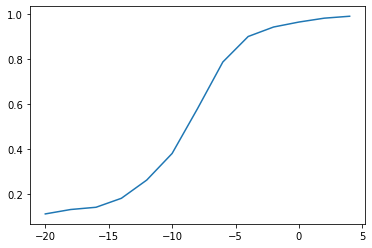

In [ ]:
pd_FM = {}

for snr in range(-20, 6, 2):
  y_snr = np.ones((X_FM_lb[snr].shape[0], 1))
  scores = model.evaluate(X_FM_lb[snr], y_snr)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  pd_FM[snr] = scores[1]
  
plt.plot(range(-20, 6, 2), list(pd_FM.values()))


**LSTM Model**

In [ ]:
X_FM_lb[-20] = X_FM_lb[-20].reshape(4999,2,1)
X_FM_lb[-18] = X_FM_lb[-18].reshape(4999,2,1)
X_FM_lb[-16] = X_FM_lb[-16].reshape(4999,2,1)
X_FM_lb[-14] = X_FM_lb[-14].reshape(4999,2,1)
X_FM_lb[-12] = X_FM_lb[-12].reshape(4999,2,1)
X_FM_lb[-10] = X_FM_lb[-10].reshape(4999,2,1)
X_FM_lb[-8] = X_FM_lb[-8].reshape(4999,2,1)
X_FM_lb[-6] = X_FM_lb[-6].reshape(4999,2,1)
X_FM_lb[-4] = X_FM_lb[-4].reshape(11999,2,1)
X_FM_lb[-2] = X_FM_lb[-2].reshape(11999,2,1)
X_FM_lb[0] = X_FM_lb[0].reshape(11999,2,1)
X_FM_lb[2] = X_FM_lb[2].reshape(11999,2,1)
X_FM_lb[4] = X_FM_lb[4].reshape(11999,2,1)

In [ ]:
seed = 9
np.random.seed(seed)
#Loading the data, here It's a feature data, which contains 4 features as mentioned in papers 

#ANN Model 
# create model
model1 = Sequential() # This means it's sequential model, which is from one direction to another in sequence 
model1.add(LSTM(7, input_shape=(2,1), kernel_initializer='uniform', activation='sigmoid'))#First layer with 20 nodes and as we have 4 features so input_dim would be 4, relu suits well for binary classification so I have used it 
#model.add(Dense(10, init='uniform', activation='relu')) #You can add asX_train many hidden layer you want, but with time complexity 
#model.add(Dense(5,init='uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #Output layer

# Compile model
#This function you have to explore in case you want to do the mathematic analysis
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X, y, epochs=20, batch_size=150, verbose=2)

Epoch 1/20
1334/1334 - 7s - loss: 0.5499 - accuracy: 0.7638
Epoch 2/20
1334/1334 - 8s - loss: 0.4392 - accuracy: 0.8014
Epoch 3/20
1334/1334 - 8s - loss: 0.4231 - accuracy: 0.8032
Epoch 4/20
1334/1334 - 8s - loss: 0.4177 - accuracy: 0.8044
Epoch 5/20
1334/1334 - 7s - loss: 0.4152 - accuracy: 0.8043
Epoch 6/20
1334/1334 - 7s - loss: 0.4136 - accuracy: 0.8050
Epoch 7/20
1334/1334 - 7s - loss: 0.4124 - accuracy: 0.8048
Epoch 8/20
1334/1334 - 8s - loss: 0.4118 - accuracy: 0.8050
Epoch 9/20
1334/1334 - 8s - loss: 0.4112 - accuracy: 0.8049
Epoch 10/20
1334/1334 - 8s - loss: 0.4114 - accuracy: 0.8048
Epoch 11/20
1334/1334 - 8s - loss: 0.4108 - accuracy: 0.8051
Epoch 12/20
1334/1334 - 8s - loss: 0.4109 - accuracy: 0.8052
Epoch 13/20
1334/1334 - 8s - loss: 0.4104 - accuracy: 0.8057
Epoch 14/20
1334/1334 - 8s - loss: 0.4100 - accuracy: 0.8054
Epoch 15/20
1334/1334 - 8s - loss: 0.4102 - accuracy: 0.8057
Epoch 16/20
1334/1334 - 8s - loss: 0.4102 - accuracy: 0.8055
Epoch 17/20
1334/1334 - 8s - loss

In [ ]:
X_FM_lb[-20].shape

(4999, 2, 1)

157/157 [==============================] - 0s 2ms/step - loss: 1.2745 - accuracy: 0.0862
At SNR = -20
accuracy: 8.62%
157/157 [==============================] - 0s 2ms/step - loss: 1.2507 - accuracy: 0.0996
At SNR = -18
accuracy: 9.96%
157/157 [==============================] - 0s 2ms/step - loss: 1.2245 - accuracy: 0.1100
At SNR = -16
accuracy: 11.00%
157/157 [==============================] - 0s 2ms/step - loss: 1.1705 - accuracy: 0.1446
At SNR = -14
accuracy: 14.46%
157/157 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.2150
At SNR = -12
accuracy: 21.50%
157/157 [==============================] - 0s 2ms/step - loss: 0.9204 - accuracy: 0.3277
At SNR = -10
accuracy: 32.77%
157/157 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5289
At SNR = -8
accuracy: 52.89%
157/157 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.7522
At SNR = -6
accuracy: 75.22%
375/375 [==============================] - 1s 2ms/st

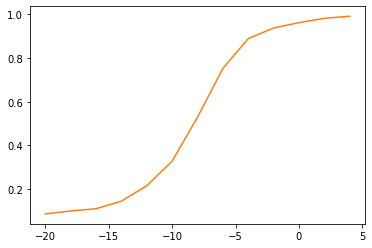

In [ ]:
pd_FM = {}

for snr in range(-20, 6, 2):
  y_snr = np.ones((X_FM_lb[snr].shape[0], 1))
  #y_snr = y_snr.reshape(4999,1)
  scores = model1.evaluate(X_FM_lb[snr], y_snr)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
  pd_FM[snr] = scores[1]
  
plt.plot(range(-20, 6, 2), list(pd_FM.values()),color ='tab:orange')
